# 监督学习


## 分回归和分类：二者区分看输出是否具有某种连续性→回归产生的结果具有连续性。


## 泛化（模型可以准确预测）、过拟合和欠拟合


![拟合](images/fitting.jpg)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# 模拟二分类的forge数据集

## 横轴和纵轴分别对应此数据集的两个特征，没个数据点对应图像中的一点

d:\python\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:(26, 2)


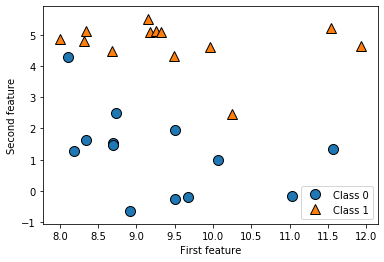

In [22]:
#生成数据集
X,y = mglearn.datasets.make_forge()
#数据集绘图
mglearn.discrete_scatter(X[:,0],X[:,1],y)  #
plt.legend(["Class 0","Class 1"],loc=4)  #图例
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("X.shape:{}".format(X.shape))

# wave回归数据集

## 只有一个输入特征和一个连续的目标变量（模型想要预测的对象）

Text(0, 0.5, 'Target')

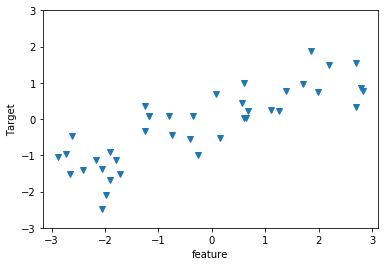

In [23]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'v')    #数据点标出（轴数据，y轴数据，format_string控制曲线的格式字串）
plt.ylim(-3,3)      #参数范围
plt.xlabel("feature")
plt.ylabel("Target")


# 实数据集（乳腺癌肿瘤的临床测量数据，每个数据都被标记良或恶）

##  任务是基于人体组织的测量数据来学习预测肿瘤的是否为恶性

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


##  注：在scikit-learn中的数据集通常被保存为Bunch对象（与字典相似，但它可以用点操作符来访问对象的值，如：bunch.key来代替bunch['key']）

In [25]:
print("Shape of cancer data:{}".format(cancer.data.shape))  #共标记569个数据点，每个点有30个特征

Shape of cancer data:(569, 30)


In [26]:
print("Shape of cancer per class:\n{}".format(
    {n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Shape of cancer per class:
{'malignant': 212, 'benign': 357}


In [27]:
print("Feature name:\n{}".format(cancer.feature_names))

Feature name:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



# 实数据集之回归（房价）

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()

print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


最初13个加上13个两两组合共104个特征

In [29]:
X,y = mglearn.datasets.load_extended_boston()

print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


## 回顾K近邻
### 构建模型只需保存训练集，做预测找最近数据点

# K近邻分类

d:\python\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


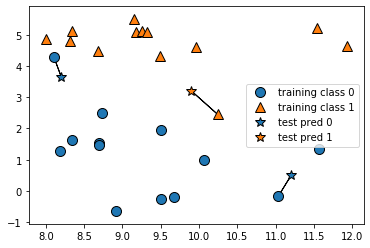

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=1)   #单一最近邻模型对forge数据集的预测

d:\python\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


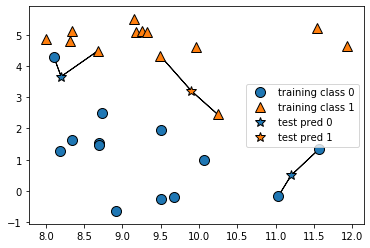

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=2)    #3近邻模型对forge数据集的预测

## 通过scikit-learn来应用k近邻算法，

## 1.将数据分为训练集和测试集

In [35]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

d:\python\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


## 2.导入类并将其实例化，设定邻居个数

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

## 3.利用训练集对分类器进行拟合，对于KN~类就是保存数据集，以便在预测时计算与邻居间距

In [37]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## 4.调用predict方法来对测试集进行预测，每个点都要计算最近邻，得出次数最多的类

In [39]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [40]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy:0.86


# 2.分析KN~类

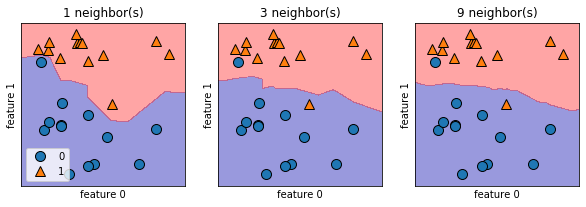

In [46]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    #fit方法返回对象本身，可将KN实例化和fit拟合放一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)  
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)  #给表一加图例